# <a name='topic'>Project Topic</a>

## Customer Churn Predictions Model for a Telecom Company
In this project I will use supervised learning, to build a  customer churn prediction model for a telecom company. I will also perform some exploratory analysis on data to identify important feature.
#
#### Goal:
Goal is to build a model to predict likelihood of customers discontinuing their services with the company to prevent such customers from leaving by offering discounts and focused services.
#
#### Type of Task and Algorithms Used:
It is a classification task to categorize customers into churned or non-churned groups. I will be using and comparing performance of Random forest, AdaBoost and Gradient Boost algorithms for it.


## Data
#### Data Source:
IBM Samples Team (2019). Telco customer churn (Version 11.1.3+)
[Data set]. Kaggle Dataset. https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset

#### Context:
The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

#### Data Description
Data has total 7043 observations with 33 variables or features.

Data size: 1.4 MB
Feature types: 24 categorical features, 9 numeric features
Feature Description:

| Variable          | Description                                                                                                                                                                                                    |
|:------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| CustomerID        | A unique ID that identifies each customer.                                                                                                                                                                     |
| Count             | A value used in reporting/dashboarding to sum up the number of customers in a filtered set.                                                                                                                    |
| Country           | The country of the customer’s primary residence.                                                                                                                                                               |
| State             | The state of the customer’s primary residence.                                                                                                                                                                 |
| City              | The city of the customer’s primary residence.                                                                                                                                                                  |
| Zip Code          | The zip code of the customer’s primary residence.                                                                                                                                                              |
| Lat Long          | The combined latitude and longitude of the customer’s primary residence.                                                                                                                                       |
| Latitude          | The latitude of the customer’s primary residence.                                                                                                                                                              |
| Longitude         | The longitude of the customer’s primary residence.                                                                                                                                                             |
| Gender            | The customer’s gender: Male, Female                                                                                                                                                                            |
| Senior Citizen    | Indicates if the customer is 65 or older: Yes, No                                                                                                                                                              |
| Partner           | Indicate if the customer has a partner: Yes, No                                                                                                                                                                |
| Dependents        | Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.                                                                                        |
| Tenure Months     | Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.                                                                                    |
| Phone Service     | Indicates if the customer subscribes to home phone service with the company: Yes, No                                                                                                                           |
| Multiple Lines    | Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No                                                                                                                     |
| Internet Service  | Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.                                                                                                        |
| Online Security   | Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No                                                                                                 |
| Online Backup     | Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No                                                                                                   |
| Device Protection | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No                                                                     |
| Tech Support      | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No                                                                                 |
| Streaming TV      | Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.                    |
| Streaming Movies  | Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.                                   |
| Contract          | Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year                                                                                                                             |
| Paperless Billing | Indicates if the customer has chosen paperless billing: Yes, No                                                                                                                                                |
| Payment Method    | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check                                                                                                                         |
| Monthly Charge    | Indicates the customer’s current total monthly charge for all their services from the company.                                                                                                                 |
| Total Charges     | Indicates the customer’s total charges, calculated to the end of the quarter specified above.                                                                                                                  |
| Churn Label       | Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.                                                                                |
| Churn Value       | 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.                                                                                   |
| Churn Score       | A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn. |
| CLTV              | Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High-value customers should be monitored for churn.  |
| Churn Reason      | A customer’s specific reason for leaving the company. Directly related to Churn Category.                                                                                                                      |


## Import all required libraries

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTENC
import seaborn as sns
import matplotlib.pylab as plt
from collections import Counter
%matplotlib inline

## Data Cleaning

### 1. Import data and visually inspect the table

In [20]:
df = pd.read_csv('./data/telco_customer_churn.csv')

In [21]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [22]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


### 2. Get overview of the data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

'Total Charges' is of object type, it should be of float type. We will convert it later.

### 3. Inspect null values

In [24]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']

for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum())

CustomerID 0 0
Count 0 0
Country 0 0
State 0 0
City 0 0
Zip Code 0 0
Lat Long 0 0
Latitude 0 0
Longitude 0 0
Gender 0 0
Senior Citizen 0 0
Partner 0 0
Dependents 0 0
Tenure Months 0 0
Phone Service 0 0
Multiple Lines 0 0
Internet Service 0 0
Online Security 0 0
Online Backup 0 0
Device Protection 0 0
Tech Support 0 0
Streaming TV 0 0
Streaming Movies 0 0
Contract 0 0
Paperless Billing 0 0
Payment Method 0 0
Monthly Charges 0 0
Total Charges 0 11
Churn Label 0 0
Churn Value 0 0
Churn Score 0 0
CLTV 0 0
Churn Reason 5174 0


We can see that:
 - the 'Total Charges' column has 11 string-typed null/none values.
 - the 'Churn Reason' column has 5174 null values.

Let's find out what are the string-typed null/none values in 'Total Charges'

In [25]:
for x in df['Total Charges']:
    if x in a[2:]:
        print(a.index(x))

13
13
13
13
13
13
13
13
13
13
13


We can see that at 'a[13]' we have space (' '). So 'Total Charges' values have empty spaces in it.
Let's replace space with null.

In [26]:
df['Total Charges'] = df['Total Charges'].replace(r'\s+', np.nan, regex=True)

Verify we don't have any string-typed null values anymore

In [27]:
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum())

CustomerID 0 0
Count 0 0
Country 0 0
State 0 0
City 0 0
Zip Code 0 0
Lat Long 0 0
Latitude 0 0
Longitude 0 0
Gender 0 0
Senior Citizen 0 0
Partner 0 0
Dependents 0 0
Tenure Months 0 0
Phone Service 0 0
Multiple Lines 0 0
Internet Service 0 0
Online Security 0 0
Online Backup 0 0
Device Protection 0 0
Tech Support 0 0
Streaming TV 0 0
Streaming Movies 0 0
Contract 0 0
Paperless Billing 0 0
Payment Method 0 0
Monthly Charges 0 0
Total Charges 11 0
Churn Label 0 0
Churn Value 0 0
Churn Score 0 0
CLTV 0 0
Churn Reason 5174 0


### 4. Convert data types

'Total Charges' column is of object type, let's convert it to float type.

In [28]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### 5. Dropping feature columns

Let's find out columns which have more than 5% null values, because imputing it will lead to lot of synthetic values in them instead of real values. We will drop them if they are not important for the task at hand.

In [29]:
num_rows = len(df)
threshold = .05*num_rows
features_to_impute = []
features_to_throw = []

for c in df.columns:
    if df[c].isnull().sum() > threshold:
        features_to_throw.append(c)
    else:
        features_to_impute.append(c)

print("features to impute: ", len(features_to_impute), features_to_impute)
print("features to throw: ", len(features_to_throw), features_to_throw)

features to impute:  32 ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV']
features to throw:  1 ['Churn Reason']


We only have one feature: 'Churn Reason' in the throw away list. Since we can perform the drop task of classification without it, let's drop the features in features_to_throw list

In [30]:
df_orig = df
for c in features_to_throw:
    df = df.drop([c],axis=1)

### 6.  Impute missing values

Histogram of features to impute to decide what would be a good approach to impute the missing values in that feature.

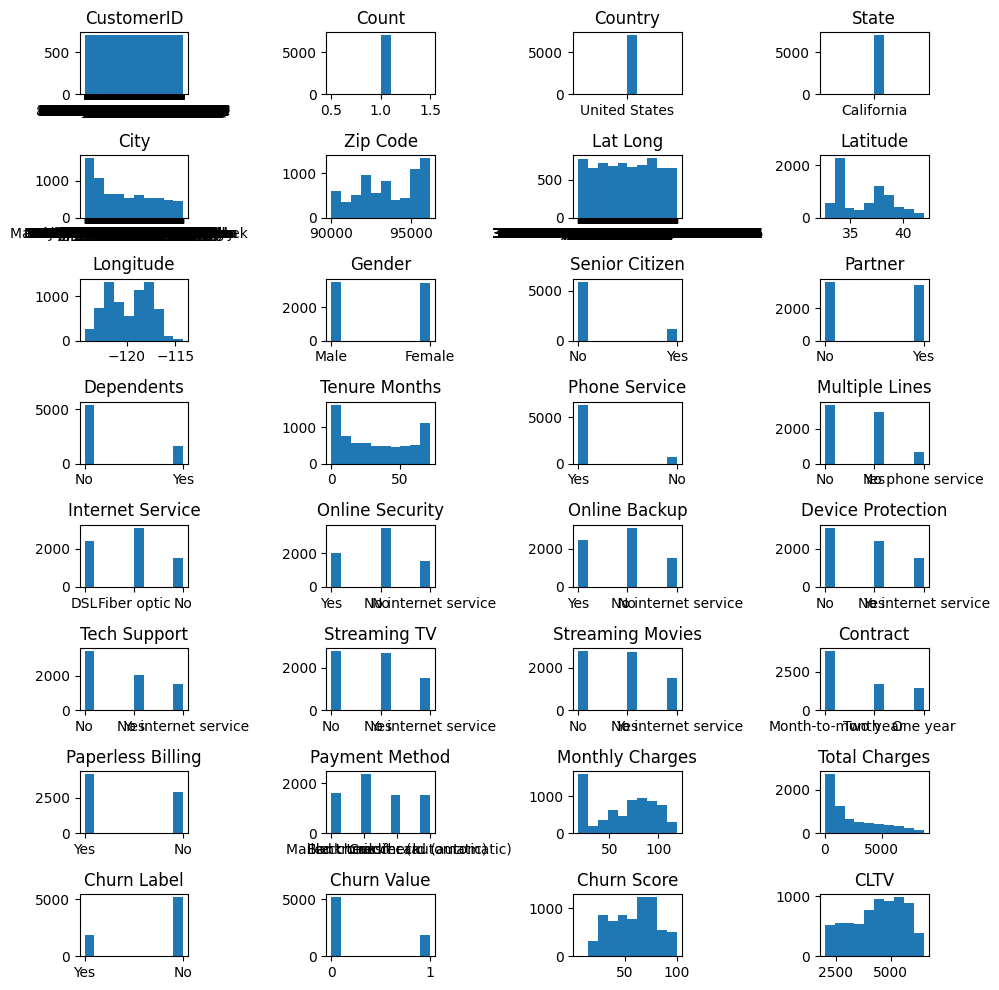

In [31]:

# Define the number of rows and columns for the grid
num_rows = 8
num_cols = 4

# Create a figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Iterate over the features to impute
for i, c in enumerate(features_to_impute):
    # Calculate the row and column index for the current feature
    row = i // num_cols
    col = i % num_cols

    # Plot the histogram on the corresponding axes
    axes[row, col].hist(df[c])
    axes[row, col].set_title(c)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Let's impute the null values in numeric features with the mean of non-null values and categorical values with the most frequent value

In [32]:
for c in features_to_impute:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64':
        df[c] = df[c].fillna(df[c].mean())
    else:
        df[c] = df[c].fillna(df[c].mode().iloc[0])

### Data Cleaning Summary

We had to perform following steps after importing the data to clean it
- We looked at the 5 head and tail rows of the data to see what kind of values are there in the columns
- Then, we looked at the overview of the columns to see the number of rows, columns and data types of each column. We identified that 'Total Charges' column dtype needed to be changed.
- Then, we inspected the columns for missing values and null. We looked for both standard and messy string-typed null values and converted string-typed null values to standard null values in 'Total Charges' column. We did it so that we can perform the dtype conversion in next step on it.
- Then, we converted the 'Total Charges' column dtype to float from object. This was done because it has number values, so we can impute them in next step.
- Then, we prepared two list of features to impute and feature to throw away using a threshold that if more than 5% values are missing then throw away the features if they are not important for the task.
- Then we imputed the missing values in the features to impute.

## Exploratory Data Analysis (EDA)

### 1. Overview of the unique values and features in data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Let's also view how many unique values each feature has in features to impute list to decide how to impute the value

In [34]:
for c in features_to_impute:
    # print(c)
    # print (df[item].unique())
    print(c, len(df[c].unique()), df[c].dtype)

CustomerID 7043 object
Count 1 int64
Country 1 object
State 1 object
City 1129 object
Zip Code 1652 int64
Lat Long 1652 object
Latitude 1652 float64
Longitude 1651 float64
Gender 2 object
Senior Citizen 2 object
Partner 2 object
Dependents 2 object
Tenure Months 73 int64
Phone Service 2 object
Multiple Lines 3 object
Internet Service 3 object
Online Security 3 object
Online Backup 3 object
Device Protection 3 object
Tech Support 3 object
Streaming TV 3 object
Streaming Movies 3 object
Contract 3 object
Paperless Billing 2 object
Payment Method 4 object
Monthly Charges 1585 float64
Total Charges 6531 float64
Churn Label 2 object
Churn Value 2 int64
Churn Score 85 int64
CLTV 3438 int64


### 2. Drop unnecessary data

Let's drop features that are unnecessary.
- CustomerID, Count is not a meaningful feature for this task as they are not related to customer churn and can be removed.
- Country, State has only 1 unique value, means they are same for all row and can be dropped.
- Lat Long, Latitude, Longitude and City can be removed since we have zipcode which captures location info.
- Churn Value can be dropped because Churn Label captures same info
- Churn Score can be dropped because we will be performing that task

In [35]:
df=df.drop(['CustomerID','Count','Country', 'State', 'Lat Long', 'Latitude', 'Longitude', 'Churn Value', 'Churn Score', 'City'],axis=1)

### 3. Data balance check for Churn Label

In [36]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn Label', ylabel='count'>

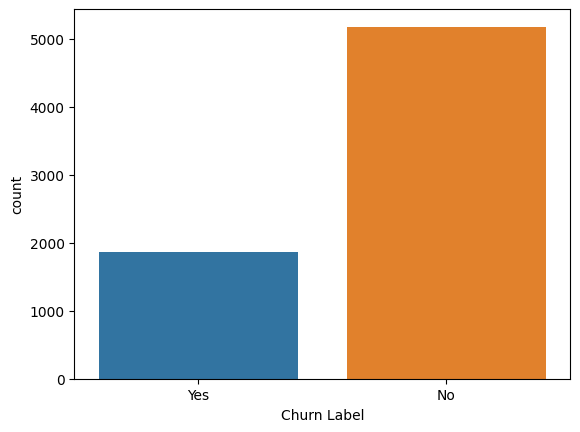

In [37]:
sns.countplot(data=df, x='Churn Label')

We should note that our dataset is imbalanced and have around 70% No churn and 30% Yes churn.

### 4. Data Munging

Let's separate features into numerical and categorical lists so that we can use it to build correlation matrix to identify which feaures are stringly related to Churn label

In [38]:
numerics_columns = df.select_dtypes(exclude='object')
categorical_columns = df.select_dtypes(include='object')
print("numerics_columns: ", len(numerics_columns.columns), numerics_columns.columns)
print("categorical_columns: ", len(categorical_columns.columns), categorical_columns.columns)
# label_encoder = LabelEncoder()

# Apply label encoding to the categorical column(s)
# df['CategoricalColumn'] = label_encoder.fit_transform(df['CategoricalColumn'])


numerics_columns:  5 Index(['Zip Code', 'Tenure Months', 'Monthly Charges', 'Total Charges',
       'CLTV'],
      dtype='object')
categorical_columns:  17 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Label'],
      dtype='object')


### 5. Inspection with Correlation Matrix for correlation between categorical features and churn label

Let's analyze which categorical features may be best predictor for Yes churn label

In [39]:
corr_df = pd.get_dummies(df[categorical_columns.columns]).corr()
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, Gender_Female to Churn Label_Yes
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender_Female                             45 non-null     float64
 1   Gender_Male                               45 non-null     float64
 2   Senior Citizen_No                         45 non-null     float64
 3   Senior Citizen_Yes                        45 non-null     float64
 4   Partner_No                                45 non-null     float64
 5   Partner_Yes                               45 non-null     float64
 6   Dependents_No                             45 non-null     float64
 7   Dependents_Yes                            45 non-null     float64
 8   Phone Service_No                          45 non-null     float64
 9   Phone Service_Yes                         45 non-null     float64
 10  Multiple Lines_No   

In [40]:
corr_df.head(2)

,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,...,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Label_No,Churn Label_Yes
Gender_Female,1.0,-1.0,-0.001874,0.001874,-0.001808,0.001808,0.005229,-0.005229,-0.006488,0.006488,...,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744,-0.008612,0.008612
Gender_Male,-1.0,1.0,0.001874,-0.001874,0.001808,-0.001808,-0.005229,0.005229,0.006488,-0.006488,...,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744,0.008612,-0.008612


In [41]:
corr_yes_churn = corr_df['Churn Label_Yes'].sort_values()[1:-1]
corr_yes_churn

Contract_Two year                          -0.302253
Dependents_Yes                             -0.248542
Streaming Movies_No internet service       -0.227890
Streaming TV_No internet service           -0.227890
Tech Support_No internet service           -0.227890
Device Protection_No internet service      -0.227890
Online Backup_No internet service          -0.227890
Online Security_No internet service        -0.227890
Internet Service_No                        -0.227890
Paperless Billing_No                       -0.191825
Contract_One year                          -0.177820
Online Security_Yes                        -0.171226
Tech Support_Yes                           -0.164674
Senior Citizen_No                          -0.150889
Partner_Yes                                -0.150448
Payment Method_Credit card (automatic)     -0.134302
Internet Service_DSL                       -0.124214
Payment Method_Bank transfer (automatic)   -0.117937
Payment Method_Mailed check                -0.

We can see that customers who could leave:
- Has Month to Month contract with company which is intuitive.
- No online security plan and No additional Tech Support plan with reduced wait times. So customers who don't have extra engagement with company and dedicated services.

Let's see the correlation using plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, 'Contract_Two year'),
  Text(1, 0, 'Dependents_Yes'),
  Text(2, 0, 'Streaming Movies_No internet service'),
  Text(3, 0, 'Streaming TV_No internet service'),
  Text(4, 0, 'Tech Support_No internet service'),
  Text(5, 0, 'Device Protection_No internet service'),
  Text(6, 0, 'Online Backup_No internet service'),
  Text(7, 0, 'Online Security_No internet service'),
  Text(8, 0, 'Internet Service_No'),
  Text(9, 0, 'Paperless Billing_No'),
  Text(10, 0, 'Contract_One year'),
  Text(11, 0, 'Online Security_Yes'),
  Text(12, 0, 'Tech Support_Yes'),
  Text(13, 0, 'Senior Citizen_No'),
  Text(14, 0, 'Partner_Yes'),
  Text(15, 0, 'Payment Method_Credit card (automatic)'),
  Text(16, 0, 'Internet Service_DSL'),
  Text(17, 0, 'Payment Method_Bank transfer (automatic)'),
  Text(18, 0, 'Pa

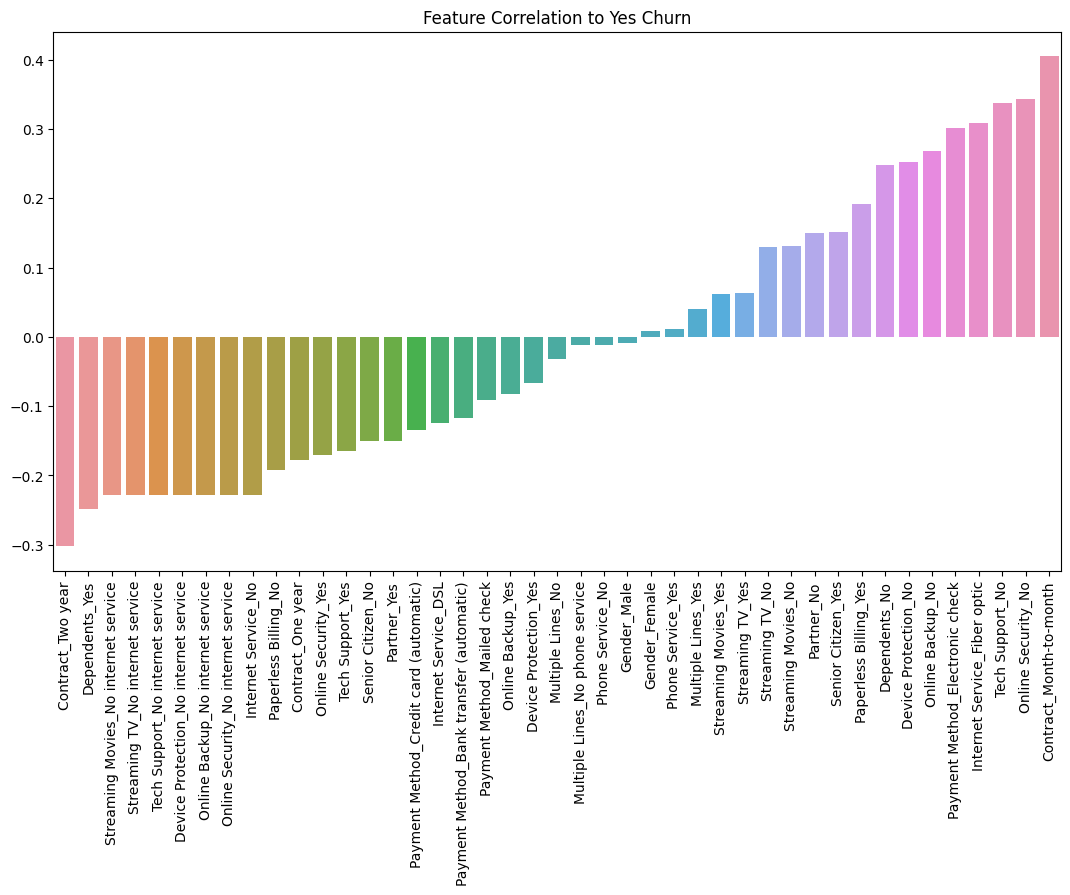

In [42]:
plt.figure(figsize=(13, 7))
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.title('Feature Correlation to Yes Churn')
plt.xticks(rotation=90)

We can see that customers with monthly contracts have the most probabillity of leaving while customers with yearly contracts have the least churn.

#### Correlation matrix visualization using heatmap

Let's visualize correlation matrix using heatmap to get a an overview

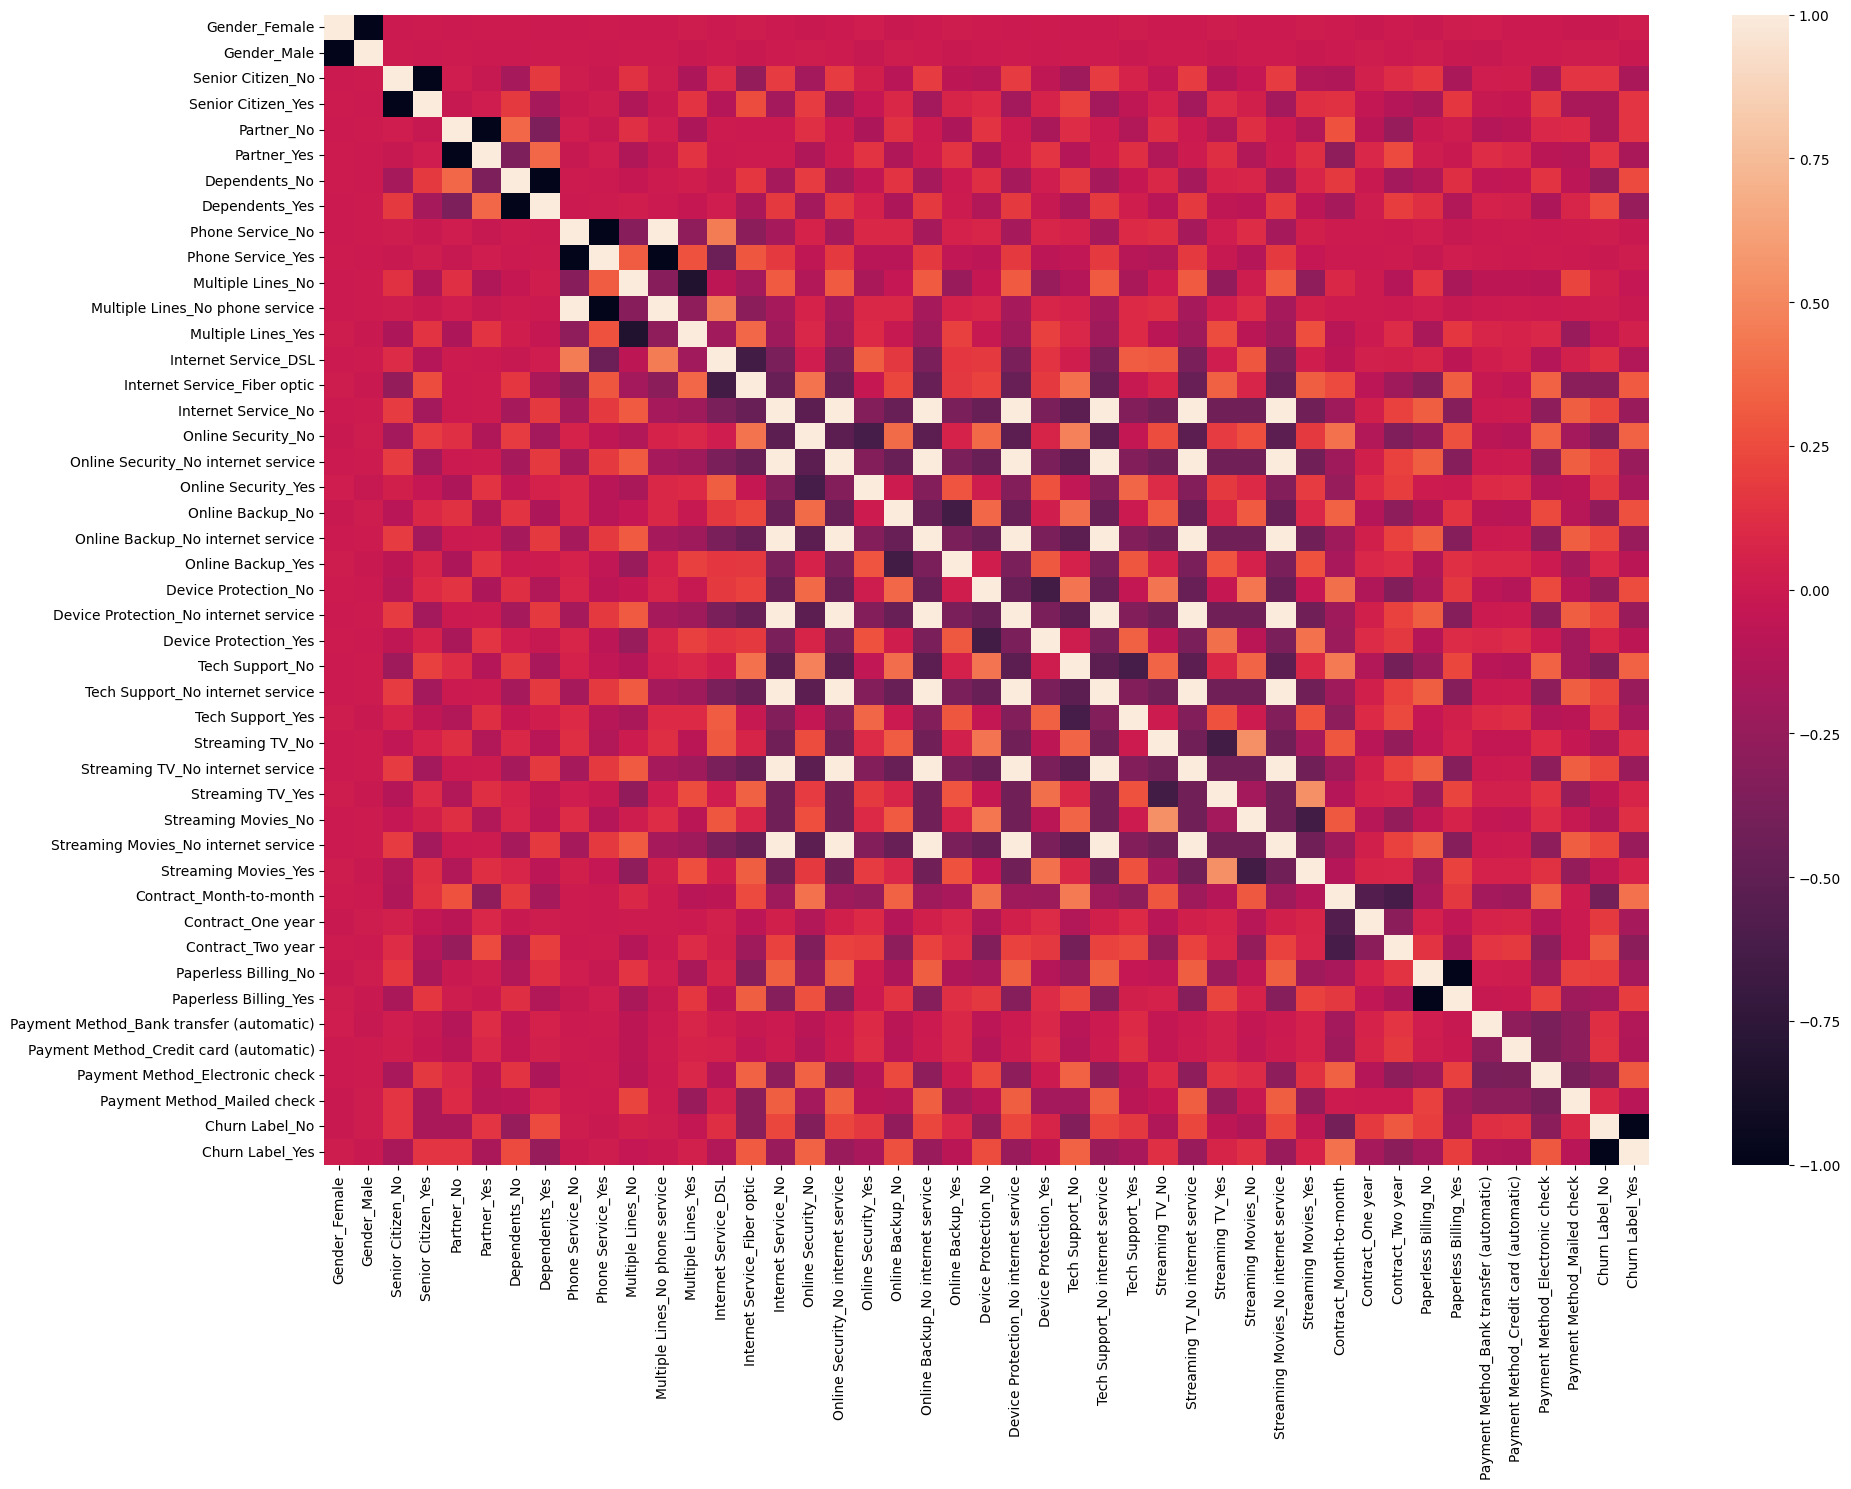

In [43]:

# Increase the size of the heatmap
plt.figure(figsize=(20, 15))

# Create the heatmap
sns.heatmap(corr_df,xticklabels=True, yticklabels=True)

# Adjust the subplots to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

### 6. More Inspection with pair plot for relationships between features

Let's see what information can we get regarding feature relations using pair plot.

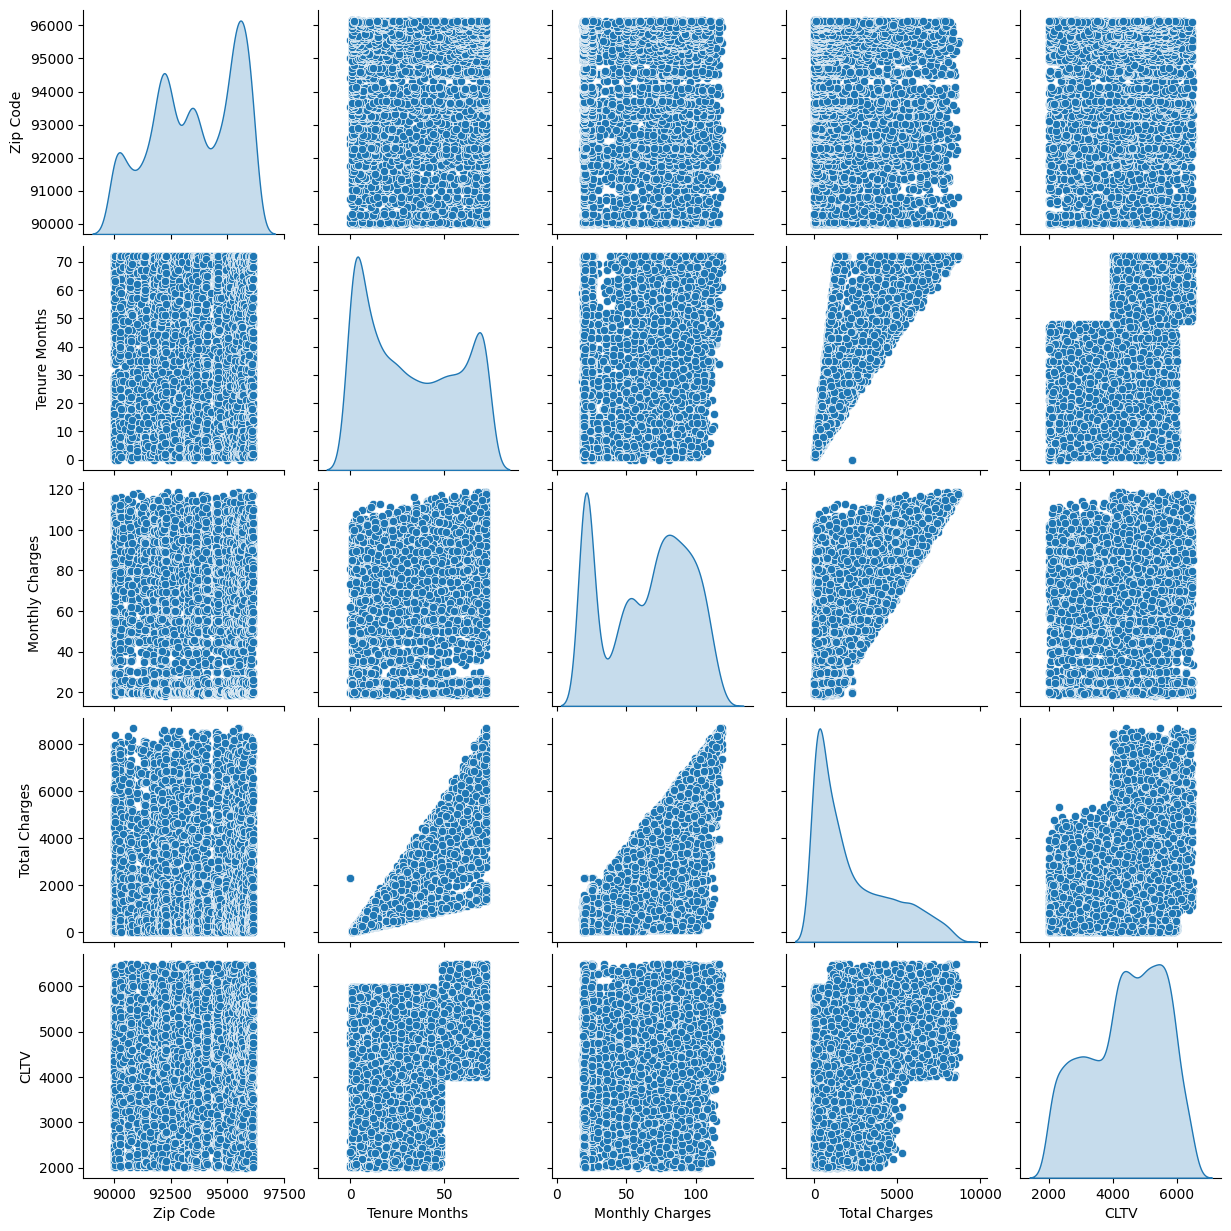

In [44]:
sns.pairplot(numerics_columns, diag_kind='kde')

We can see that total charges is collinear to monthly charges and tenure months, which is expected because higher tenure and monthly charges will lead to higher total charges.

We will have to first encode the categorical lables to numeric values. We will do that using LabelEncoder from scikit-learn.

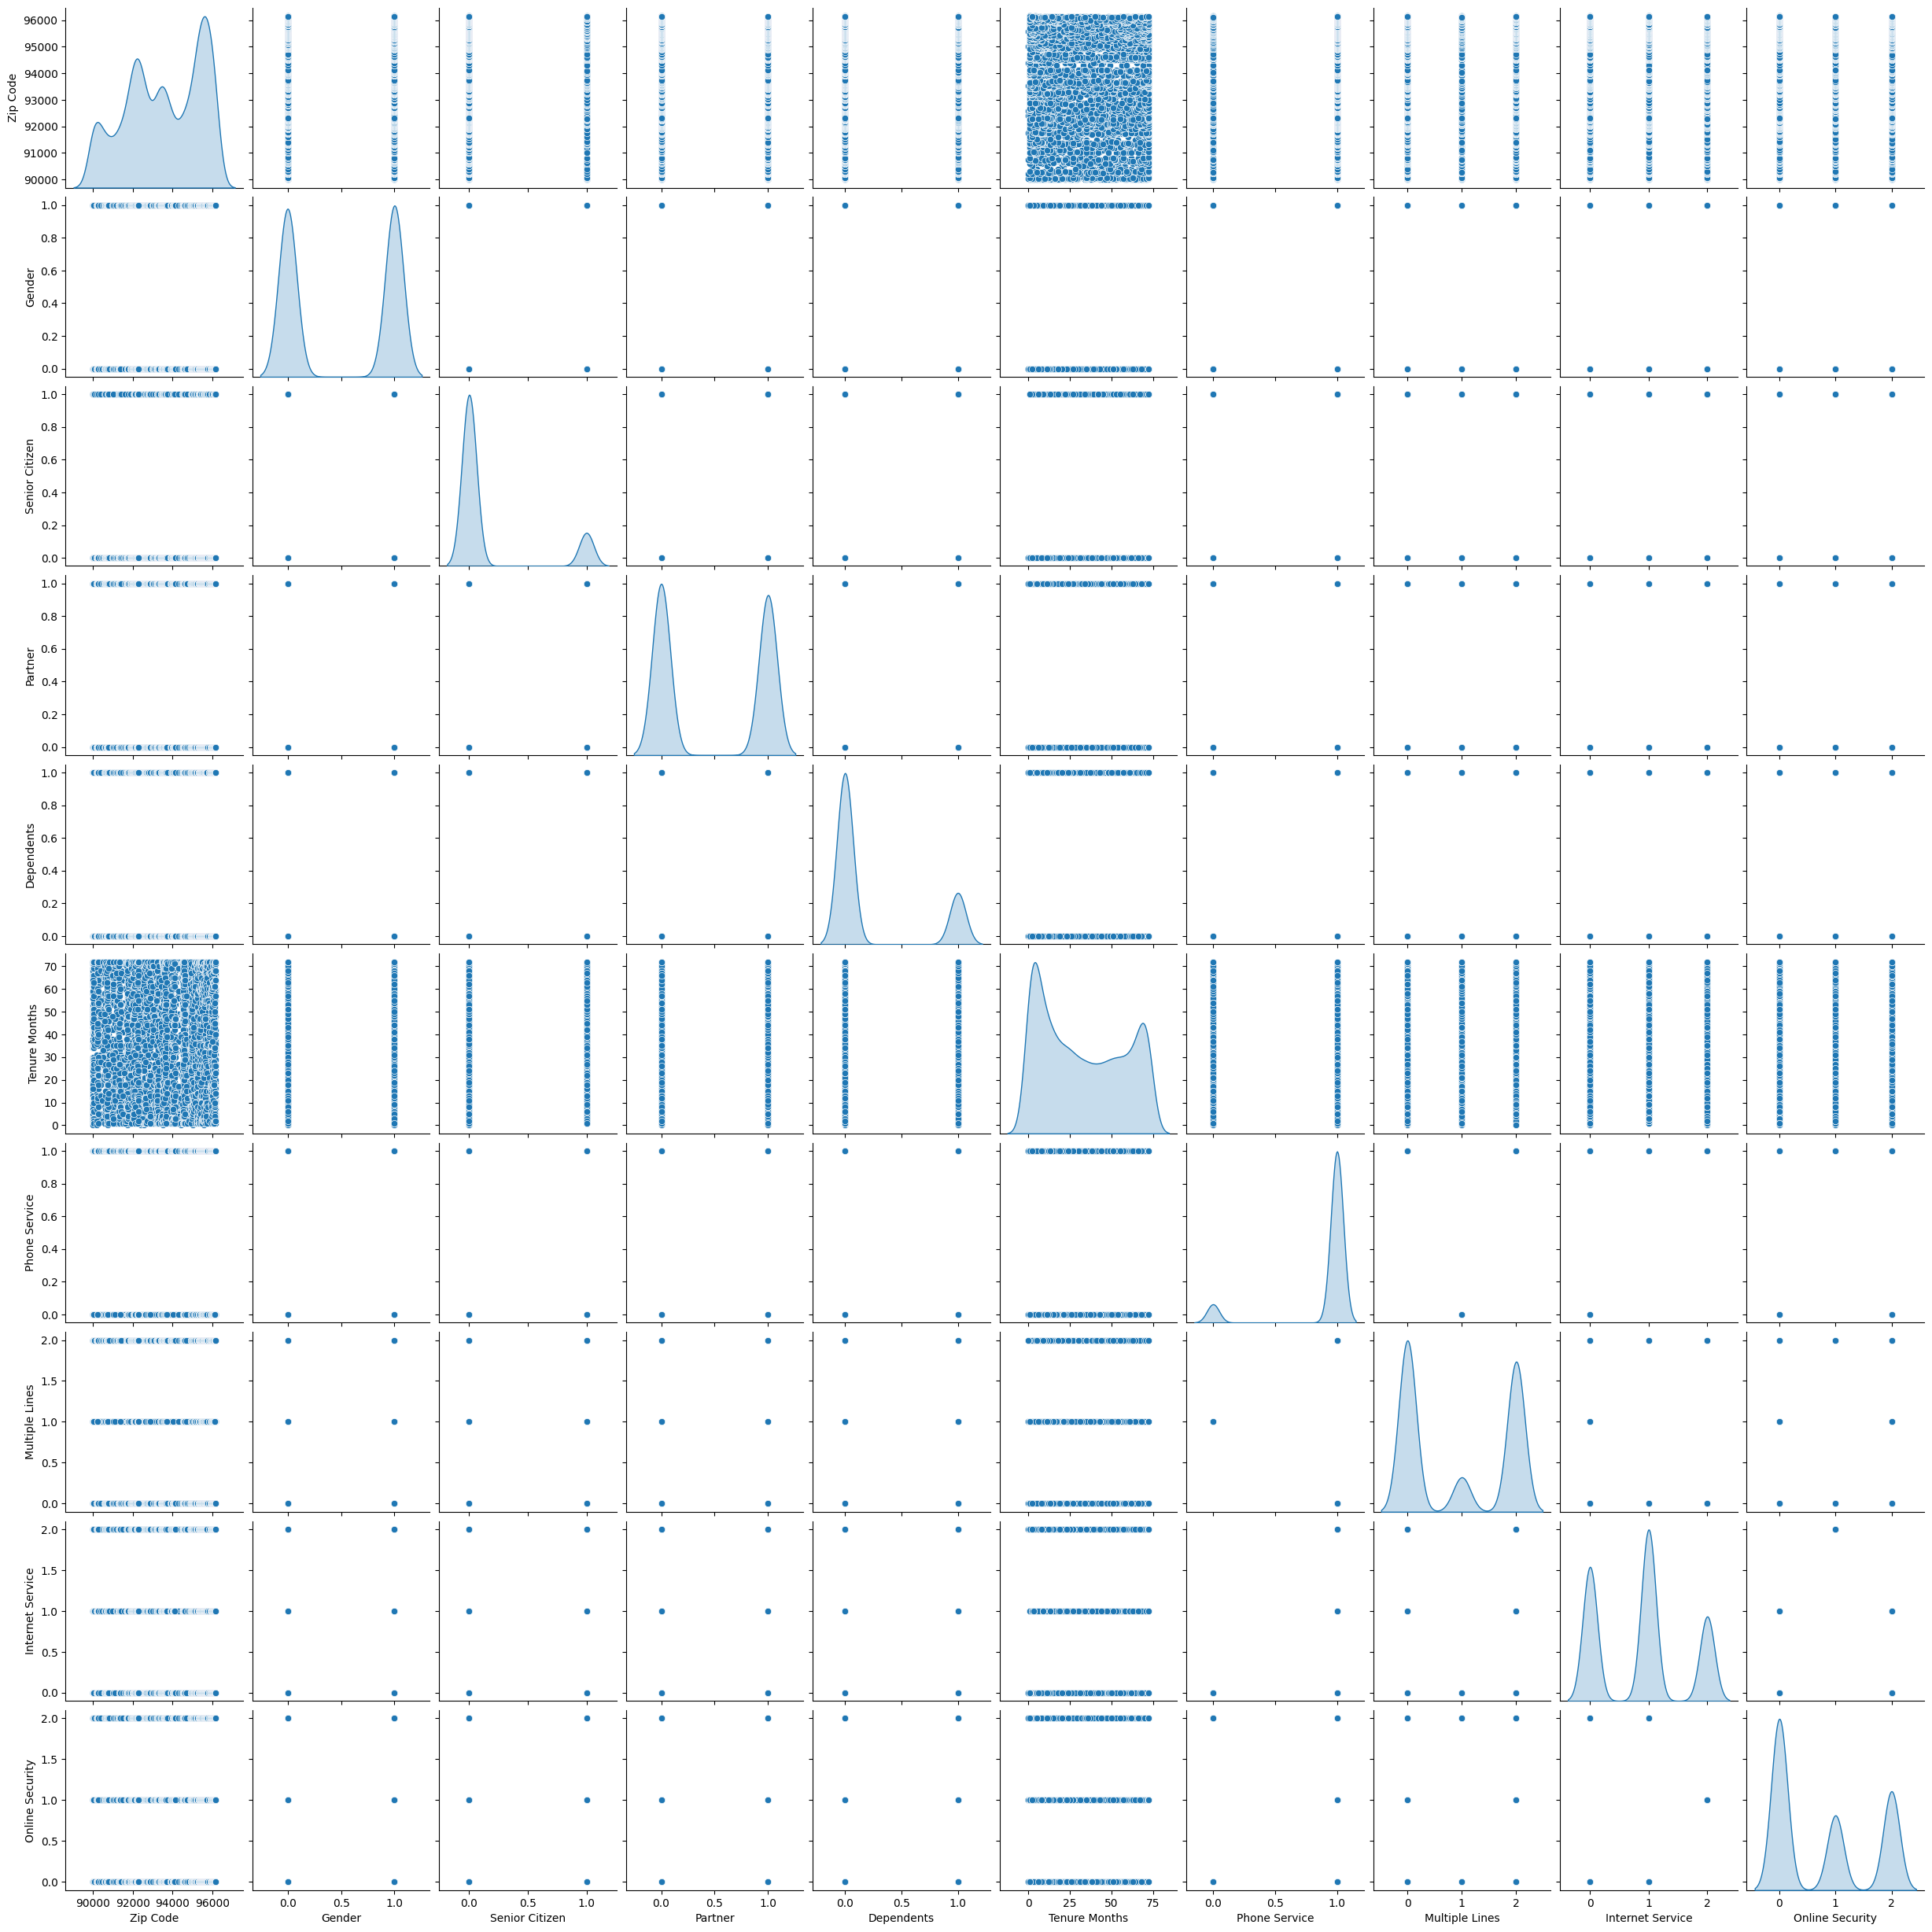

In [45]:
encoded_df = df

# Create a LabelEncoder object
label_encoder = LabelEncoder()

for c in categorical_columns.columns:
    # Apply label encoding to the categorical column(s)
    encoded_df[c] = label_encoder.fit_transform(encoded_df[c])

# Plot the pair plot
sns.pairplot(encoded_df.iloc[:, : 10], diag_kind='kde')

We did not get much information from pair plot because data is widely distributed and we could only build pair plot using 10 rows other it will take lot of time to generate the plot.

Analyze relation of Total Charges with the Churn Label

<Axes: xlabel='Churn Label', ylabel='Total Charges'>

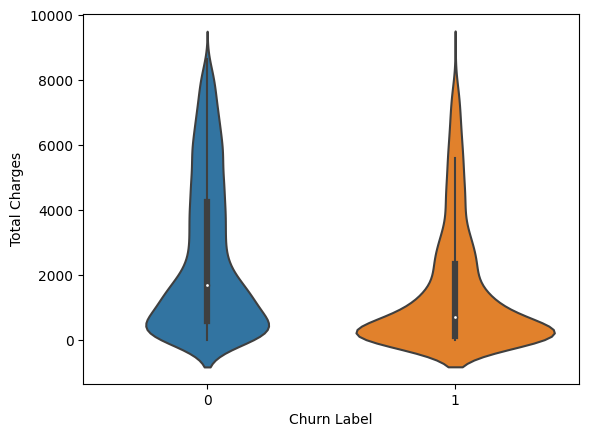

In [46]:
sns.violinplot(data=df, x='Churn Label', y='Total Charges')

We can see that customer with Churn have less total charges median, which suggests

### EDA Summary

In EDA we perfomed many steps such as:
- Looking at the high-level summary of our data.
- Dropping features which were unnecessary.
- Checking data balance for our target feature Churn Label.
- Data munging to analyze which categorical and numerical features are be better suited for Churn Label.
- Analysing correlation of features for our target feature via correlation matrix and heatmap.

We learned that
- Our Churn Label target feature is imbalanced with 70% No and 30% Yes.
- Monthly contract customers are most likely to churn as well as customer which don't use other services for better service like Online Securoty and Tech Support plan
- Yearly contract customers are least likely to churn, which is understandable because new customer churn more than old customers.
- We also learned that customer who churn more have lower median Total Charges i.e., Customers which are new or use less services leave more.
- We learned that total charges is collinear to monthly charges and tenure months, which is expected because higher tenure and monthly charges will lead to higher total charges. It should be dropped.

We faced difficulty in identifying relationship between features because pair plot generation takes too much time for our data. So we used 10 rows but that did not give any indication as data is quite varied.

## Models

### 1. Drop ‘Total Charges’ due to collinearity with ‘Tenure Months’ and ‘Monthly Charges’


We should remove the 'Total Charges' column first since it's information is captured by tenure and Monthly charges and it has colliniarity with them.

In [47]:
df=df.drop(['Total Charges'],axis=1)

### 2. Train Test split

Let's create our train and test datasets

In [48]:
X = df.drop(['Churn Label'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Churn Label']

# We will split train and test dataset in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=10)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=10)

### 3. Single Decision Tree Model 

Let's build our first model which is Singel Decision Tree Model. We will use the GridSearchCV tool from sklearn adn pass it a dictionary of possible values for different hyperparameters. GridSearch will evaluate with different combinations for given hyperparameters, and we will choose the best model.

In [49]:
paramaters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3,20,1),
    'max_features': ['sqrt', 'log2'],
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), paramaters, cv=5).fit(X_train, y_train)

Let's print the best parameters and best estimator

In [50]:
print("best parameters: ",dt_grid.best_params_)
print("best estimator: ",dt_grid.best_estimator_)

best parameters:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}
best estimator:  DecisionTreeClassifier(max_depth=6, max_features='sqrt')


Let's evaluate our model against test data. Since our target feature was imbalanced, we will evaluate metrics that are robust to class imbalance, such as Precision, Recall and F1-Score rather than solely relying on accuracy.

In [51]:
dt_predictions = dt_grid.predict(X_test)
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



Let's build confusion matrix

Confusion Matrix:
[[910 125]
 [190 184]]


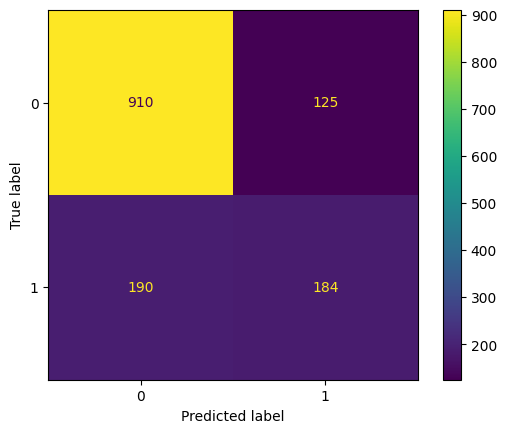

In [52]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, dt_predictions)

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix plot
cm_display.plot()
plt.show()

Observation:
- Model has good overall accuracy of 78%
- However, precision, F1-score and recall for Yes churn label is much less tha no No churn label.
- It is important to note that data imbalance in our churn label feature is reflected in F1-score

There are total 315 (190+125) misclassifications with 190 False Negatives and 125 False Positives.

### 4. Random Forest Model

Let's build Random forest model and see if we can improve predictions. We will be again using GridSearchCV here as well for changing hyperparameters and geting best model.

In [53]:
parameters = {
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 128, 256],
    'max_features': ["sqrt", "log2"],
}

rf_grid = GridSearchCV(RandomForestClassifier(), parameters, cv=5, n_jobs=-1).fit(X_train, y_train) # n_jobs=-1: This parameter specifies the number of jobs to run in parallel for fitting the models and performing cross-validation. A value of -1 indicates that all available CPU cores will be used.

Let's print the best parameters and best estimator

In [54]:
print("best parameters: ",rf_grid.best_params_)
print("best estimator: ",rf_grid.best_estimator_)

best parameters:  {'max_features': 'log2', 'n_estimators': 64}
best estimator:  RandomForestClassifier(max_features='log2', n_estimators=64)


Let's evaluate our model against test data. Since our target feature was imbalanced, we will evaluate metrics that are robust to class imbalance, such as Precision, Recall and F1-Score rather than solely relying on accuracy.

In [55]:
rf_predictions = rf_grid.predict(X_test)
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Let’s build confusion matrix

Confusion Matrix:
[[930 105]
 [188 186]]


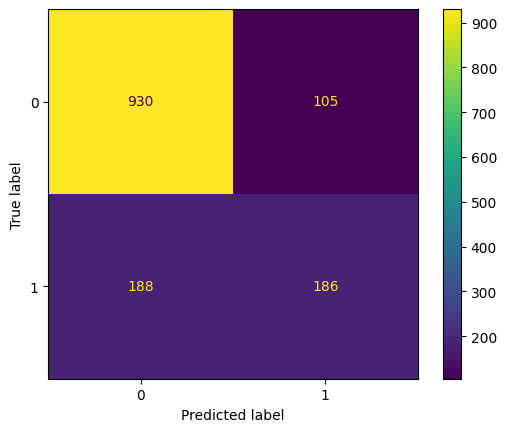

In [56]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix plot
cm_display.plot()
plt.show()

Observation:
- Model has good overall accuracy of 80% compared to 78% of Single DT.
- Precision, F1-score and recall have improved marginally compared to Single DT but still for Yes churn label is much less tha no No churn label.

There are total 293 (188+105) misclassifications with 188 False Negatives and 105 False Positives which is better than Single DT.

Overall we can say that accuracy is not improving compared to Decision Tree, Recall, F1-Score are slightly better.

### 5. Ada Boost Tree Model

Since we did not get improvement in performance with Random forest, let's build an Ada Boost Tree model.

In [57]:
ada_model = AdaBoostClassifier()
parameters = {
    'n_estimators': np.arange(10, 200, 10),
}

ada_grid = GridSearchCV(ada_model, parameters, cv=5).fit(X_train, y_train)

Let's print the best parameters and best estimator

In [58]:
print("best parameters: ",ada_grid.best_params_)
print("best estimator: ",ada_grid.best_estimator_)

best parameters:  {'n_estimators': 50}
best estimator:  AdaBoostClassifier()


Let's evaluate our model against test data. Since our target feature was imbalanced, we will evaluate metrics that are robust to class imbalance, such as Precision, Recall and F1-Score rather than solely relying on accuracy.

In [59]:
ada_predictions = ada_grid.predict(X_test)
print(classification_report(y_test, ada_predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1035
           1       0.63      0.55      0.59       374

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



Let's build confusion metrix

Confusion Matrix:
[[912 123]
 [167 207]]


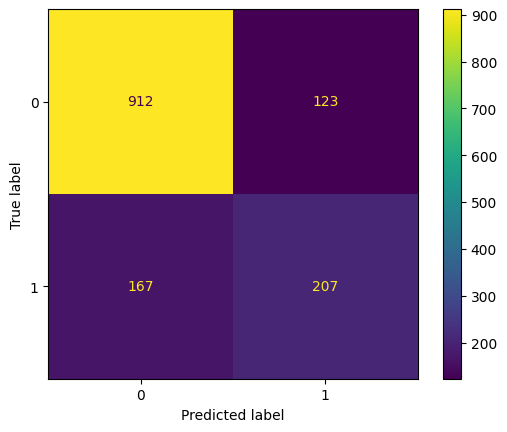

In [60]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, ada_predictions)

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix plot
cm_display.plot()
plt.show()

Observation:
There are total 290 (167+123) misclassifications with 167 False Negatives and 123 False Positives.

Overall we can say that accuracy is not improving compared to previous models.

### 6. Gradient Boost Tree Model

Since we did not get improvement in performance with with any previous model, let's build an Gradient Boost Tree model and comapre that.

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.54      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[937  98]
 [172 202]]


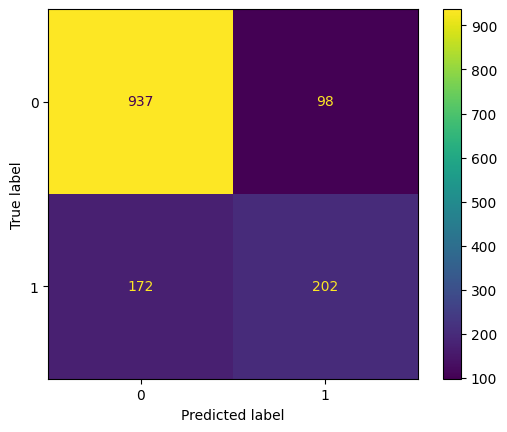

In [61]:
gb_model = GradientBoostingClassifier()
gb_grid = GridSearchCV(gb_model, parameters, cv=5)
gb_grid.fit(X_train, y_train)
gb_predictions = gb_grid.predict(X_test)

print(classification_report(y_test, gb_predictions))
# Generate the confusion matrix
cm = confusion_matrix(y_test, gb_predictions)

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix plot
cm_display.plot()
plt.show()

Observation:
- Model has good overall accuracy of 81% compared to 78% of Single DT.
- Precision, F1-score and recall have improved compared to Single DT but still for Yes churn label is much less tha no No churn label.

There are total 270 (172+98) misclassifications with 172 False Negatives and 98 False Positives.

Overall we can say that this is the best model we got.

### Gradient Boost Model is the best among all model, even though marginally. Let's balance our data and see if we can improve it further for Yes Churn labels.

## Result and Analysis

### 1. Summary

- We dropped the collinear column 'Total Charges'
- Then we did 80:20 split of the data for train and test while maintaining the original ratio of yes and No Churn labels in train and test.
- Then we build Single Decision Tree model, Randon Forest, Ada Boost and Gradient Boost Tree model to improve the predictions
- Since our target feature values were imbalanced we used F1-score, precision and recall metrics to evaluate models instead of just accuracy.
- We found that Gradient boost had the best F1-score, accuracy and False Negatives on imbalanced data.

### 2. Analysis: Balance the data using SMOTE

Let's balance our dataset using SMOTENC tool to oversample our minority samples. We need to use SMOTE-NC because we have cases of mixed data, otherwise we would have used SMOTE.

In [62]:
# Get the column indices
column_indices = [df.columns.get_loc(col) for col in categorical_columns.columns]

print(column_indices)

[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]


Original dataset samples per class Counter({0: 4139, 1: 1495})


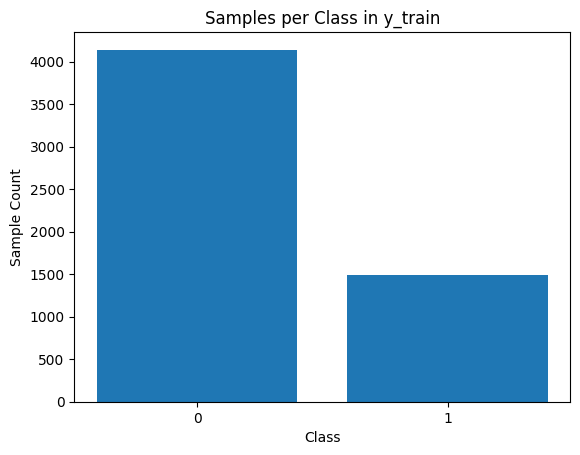

Resampled dataset samples per class Counter({1: 4139, 0: 4139})


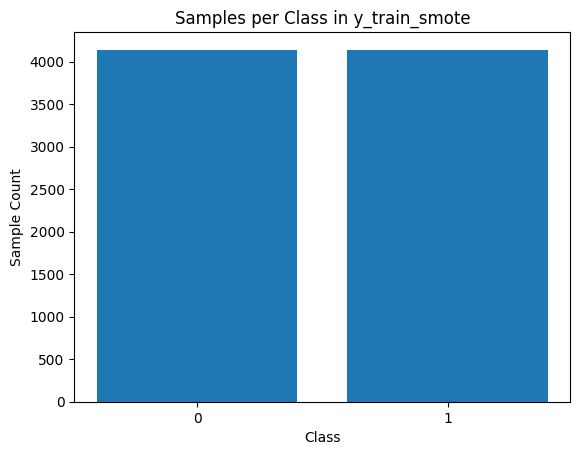

In [69]:
# Create the SMOTE object and specify the sampling strategy
smotenc = SMOTENC(column_indices,random_state = 101)
# Apply SMOTE to the training data
print(f'Original dataset samples per class {Counter(y_train)}')
# Count the occurrences of each class in y_train
class_counts = Counter(y_train)

# Extract class labels and corresponding sample counts
labels = ['0', '1']
counts = [class_counts[0], class_counts[1]]

# Plotting the bar plot
plt.bar(labels, counts)
plt.xlabel('Class')
plt.ylabel('Sample Count')
plt.title('Samples per Class in y_train')
plt.show()

X_train_smote, y_train_smote = smotenc.fit_resample(X_train, y_train)
print(f'Resampled dataset samples per class {Counter(y_train_smote)}')
# Count the occurrences of each class in y_train_smote
class_counts = Counter(y_train_smote)

# Extract class labels and corresponding sample counts
labels = ['0', '1']
counts = [class_counts[0], class_counts[1]]

# Plotting the bar plot
plt.bar(labels, counts)
plt.xlabel('Class')
plt.ylabel('Sample Count')
plt.title('Samples per Class in y_train_smote')
plt.show()

As we can see that now training data has equal samples for both 0 (No) and 1 (Yes) Churn Label

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1035
           1       0.59      0.71      0.65       374

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.79      0.80      1409

Confusion Matrix:
[[853 182]
 [109 265]]


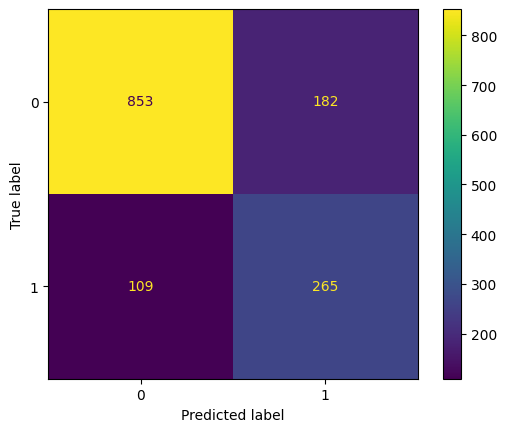

In [ ]:
gb_model_smote = GradientBoostingClassifier()
gb_grid_smote = GridSearchCV(gb_model_smote, parameters, cv=5)
gb_grid_smote.fit(X_train_smote, y_train_smote)
gb_predictions_smote = gb_grid_smote.predict(X_test)

print(classification_report(y_test, gb_predictions_smote))
# Generate the confusion matrix
cm = confusion_matrix(y_test, gb_predictions_smote)

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix plot
cm_display.plot()
plt.show()

### Observation:
- Model has overall good accuracy of 79%, it is 1% less than what we got without balancing data.
- Precision, F1-score and recall for Yes churn label has improved compared to No churn label. And the difference is least between them in this model.
There are total 291 (109+182) misclassifications with 109 False Negatives and 182 False Positives.

Compared to the previous gradient model without balancing the data, it has better performance because it generated less false Nagatives which is critical because we don't want to predict No churn for a customer is about to leave. And it has good F1-score score for both No and Yes churn labels.

### 3. Feature importance

Let's find out the feature importance order from the best model.

In [ ]:
imp_features = pd.DataFrame(data=gb_grid_smote.best_estimator_.feature_importances_,
                                               index=X.columns,
                                               columns=['Feature Importance'])
imp_features.sort_values('Feature Importance', ascending=False)

,Feature Importance
Contract,0.419594
Online Security,0.114568
Tech Support,0.111135
Dependents,0.085949
Tenure Months,0.055818
Payment Method,0.045081
Monthly Charges,0.043621
Paperless Billing,0.029606
Zip Code,0.029480
CLTV,0.018424


We can see that tenure months, total charges and monthly charges are important features.

Let's remove the feature with 0 importance and visualize it

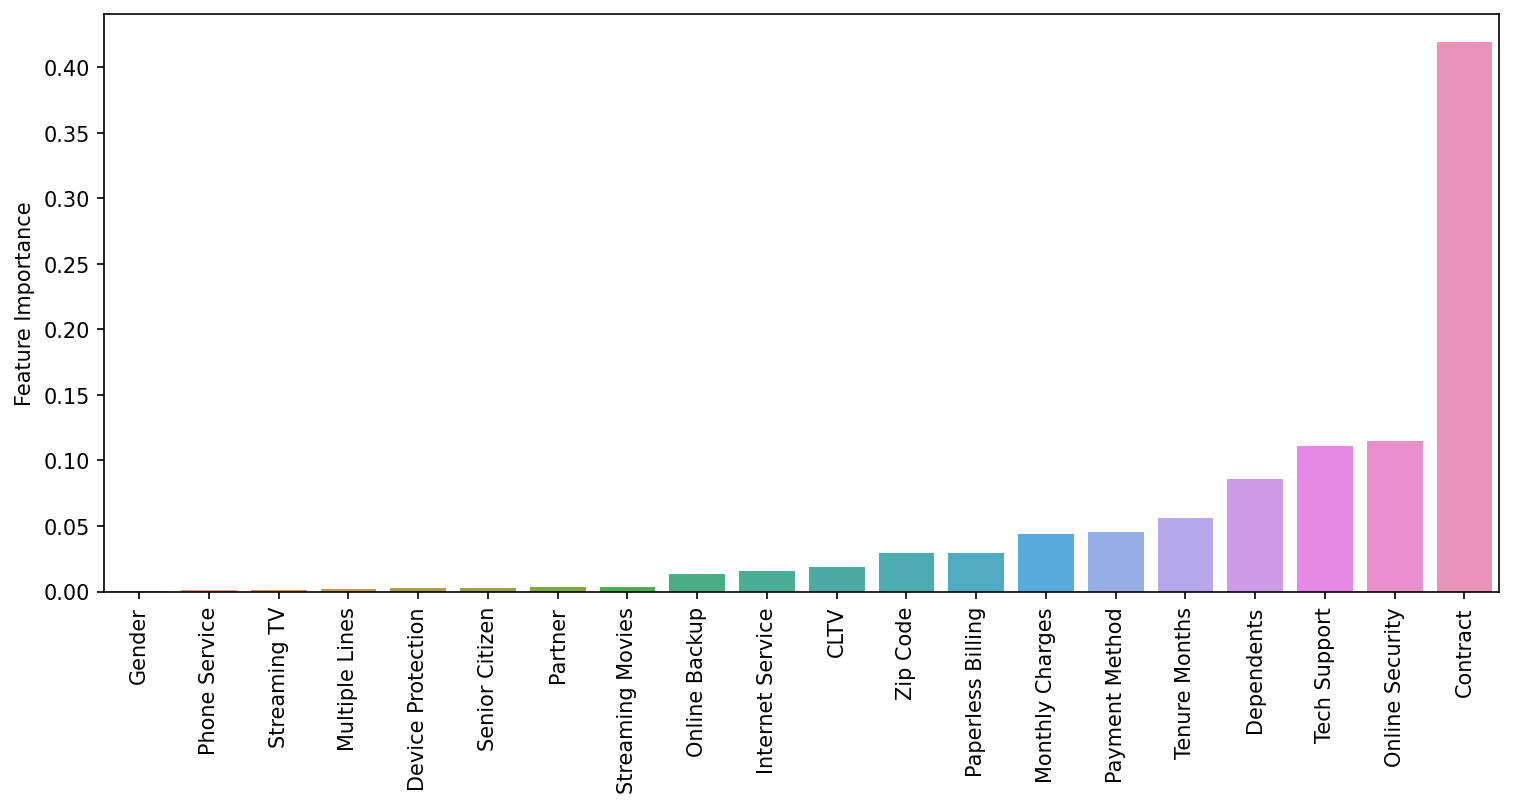

In [ ]:
imp_features = imp_features[imp_features['Feature Importance']  > 0].sort_values('Feature Importance')
plt.figure(figsize=(12, 5), dpi=150)
sns.barplot(data=imp_features, x=imp_features.index, y='Feature Importance');
plt.xticks(rotation=90);

### 4. Results

We found that:
- Gradient boost tree model on balanced data has best performance.
- It generated less false Nagatives which is critical because we don’t want to predict No churn for a customer is about to leave. And it has good F1-score score for both No and Yes churn labels.
- Contract (Monthly, Yearly), Online Security plan and Teach Support plan are the top 3 important features to predict Churn for a customer.
- We identified same features through EDA process as well and model predictions have verified that.

## Discussion and Conclusion

We can conclude that there was difficulty faced to identify collinearity between all features due to long time it would take. So we analysed the numeric and categorical features separately which worked fine.
We had imbalance in our target feature of Churn labels which affected all our models. Even with oversampling(SOMET) technique our performance did not improve much. May be we should take less samples from No Churn labels instead of increasing Yes Churn labels.

Overall, our model was able to predict Churn for customer effectively with less False Negatives which is critical for this task so that we don't ignore customer which could leave.

### GitHub Link:

https://github.com/arunattri26/MSDS/tree/main/DTSA_5509_Introduction_to_Machine_Learning